<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [99]:
breast_cancer = load_breast_cancer()

data=breast_cancer.data
target=breast_cancer.target

X_train,X_test,y_train,y_test= train_test_split(data,target)

y_train=y_train.reshape(1,len(y_train))
X_train =np.concatenate((X_train,y_train.T), axis=1) 

print("Number of features: ",X_train.shape[1]-1)
print("Number of classes: ",len(list(breast_cancer.target_names)))
print('classes names:',breast_cancer.target_names)

Number of features:  30
Number of classes:  2
classes names: ['malignant' 'benign']


In [100]:
def split(data,i,value):
    left = data[np.where(data[:,i] >= value)]
    right = data[np.where(data[:,i] < value)]
    return left,right

In [101]:
def check_purity(X):
    label_column = X[:,-1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

In [102]:
def classify_data(data):
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification   

In [103]:
def gini(Y1,Y2):
    size_L=len(Y1)
    size_R=len(Y2)
    pos_L=(Y1 == 1).sum()
    neg_L=size_L-pos_L
    pos_R=(Y2 == 1).sum()
    neg_R=size_R-pos_R
    P_l=1-1*(pos_L/size_L)**2 -1*(neg_L/size_L)**2 
    P_r=1-1*(pos_R/size_R)**2 -1*(neg_R/size_R)**2 
    gini_value=(P_l*size_L/(size_L+size_R))+(P_r*size_R/(size_L+size_R))
    return gini_value

In [104]:
def find_best_gini(X):
    mean1,gini1=[],[]
    for i in range(0,X.shape[1]-1):
        mean = X[:,i].mean()
        mean1.append(mean)
        L,R=split(X,i,mean)
        gini_val=gini(L[:,-1],R[:,-1])
        gini1.append(gini_val)
    return gini1.index(min(gini1)),mean1[gini1.index(min(gini1))]

In [105]:
def accuracy(predict,actual):
    count=0
    for i in range(len(predict)):
        if predict[i]==actual[i]:
            count+=1
    return(count/len(predict))

In [106]:
def decision_tree_algorithm(data, counter=0, min_samples=2, max_depth=4):
   
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    else:    
        counter += 1
        index,value=find_best_gini(data)
        L,R = split(data, index, value)
        question = "{} <= {}".format(index, value)
        sub_tree = {question: []}
        yes_answer = decision_tree_algorithm(L, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(R, counter, min_samples, max_depth)
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        return sub_tree


In [107]:
def classify(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")
    feature_name=int(feature_name)
    if example[feature_name] <= float(value):
        answer = tree[question][1]
    else:
        answer = tree[question][0]
    if not isinstance(answer, dict):
        return answer
    else:
        residual_tree = answer
        return classify(example, residual_tree)  

In [108]:
tree_scrath=decision_tree_algorithm(X_train, counter=0, min_samples=2, max_depth=5)

result=list()
for i in range(len(X_test)):
    result.append(classify(X_test[i,:],tree_scrath))
 
print('accuracy percentage {:.2%}'.format(accuracy(result,y_test)))

accuracy percentage 93.71%


Sklearn with cross validation accuracy  93.01%


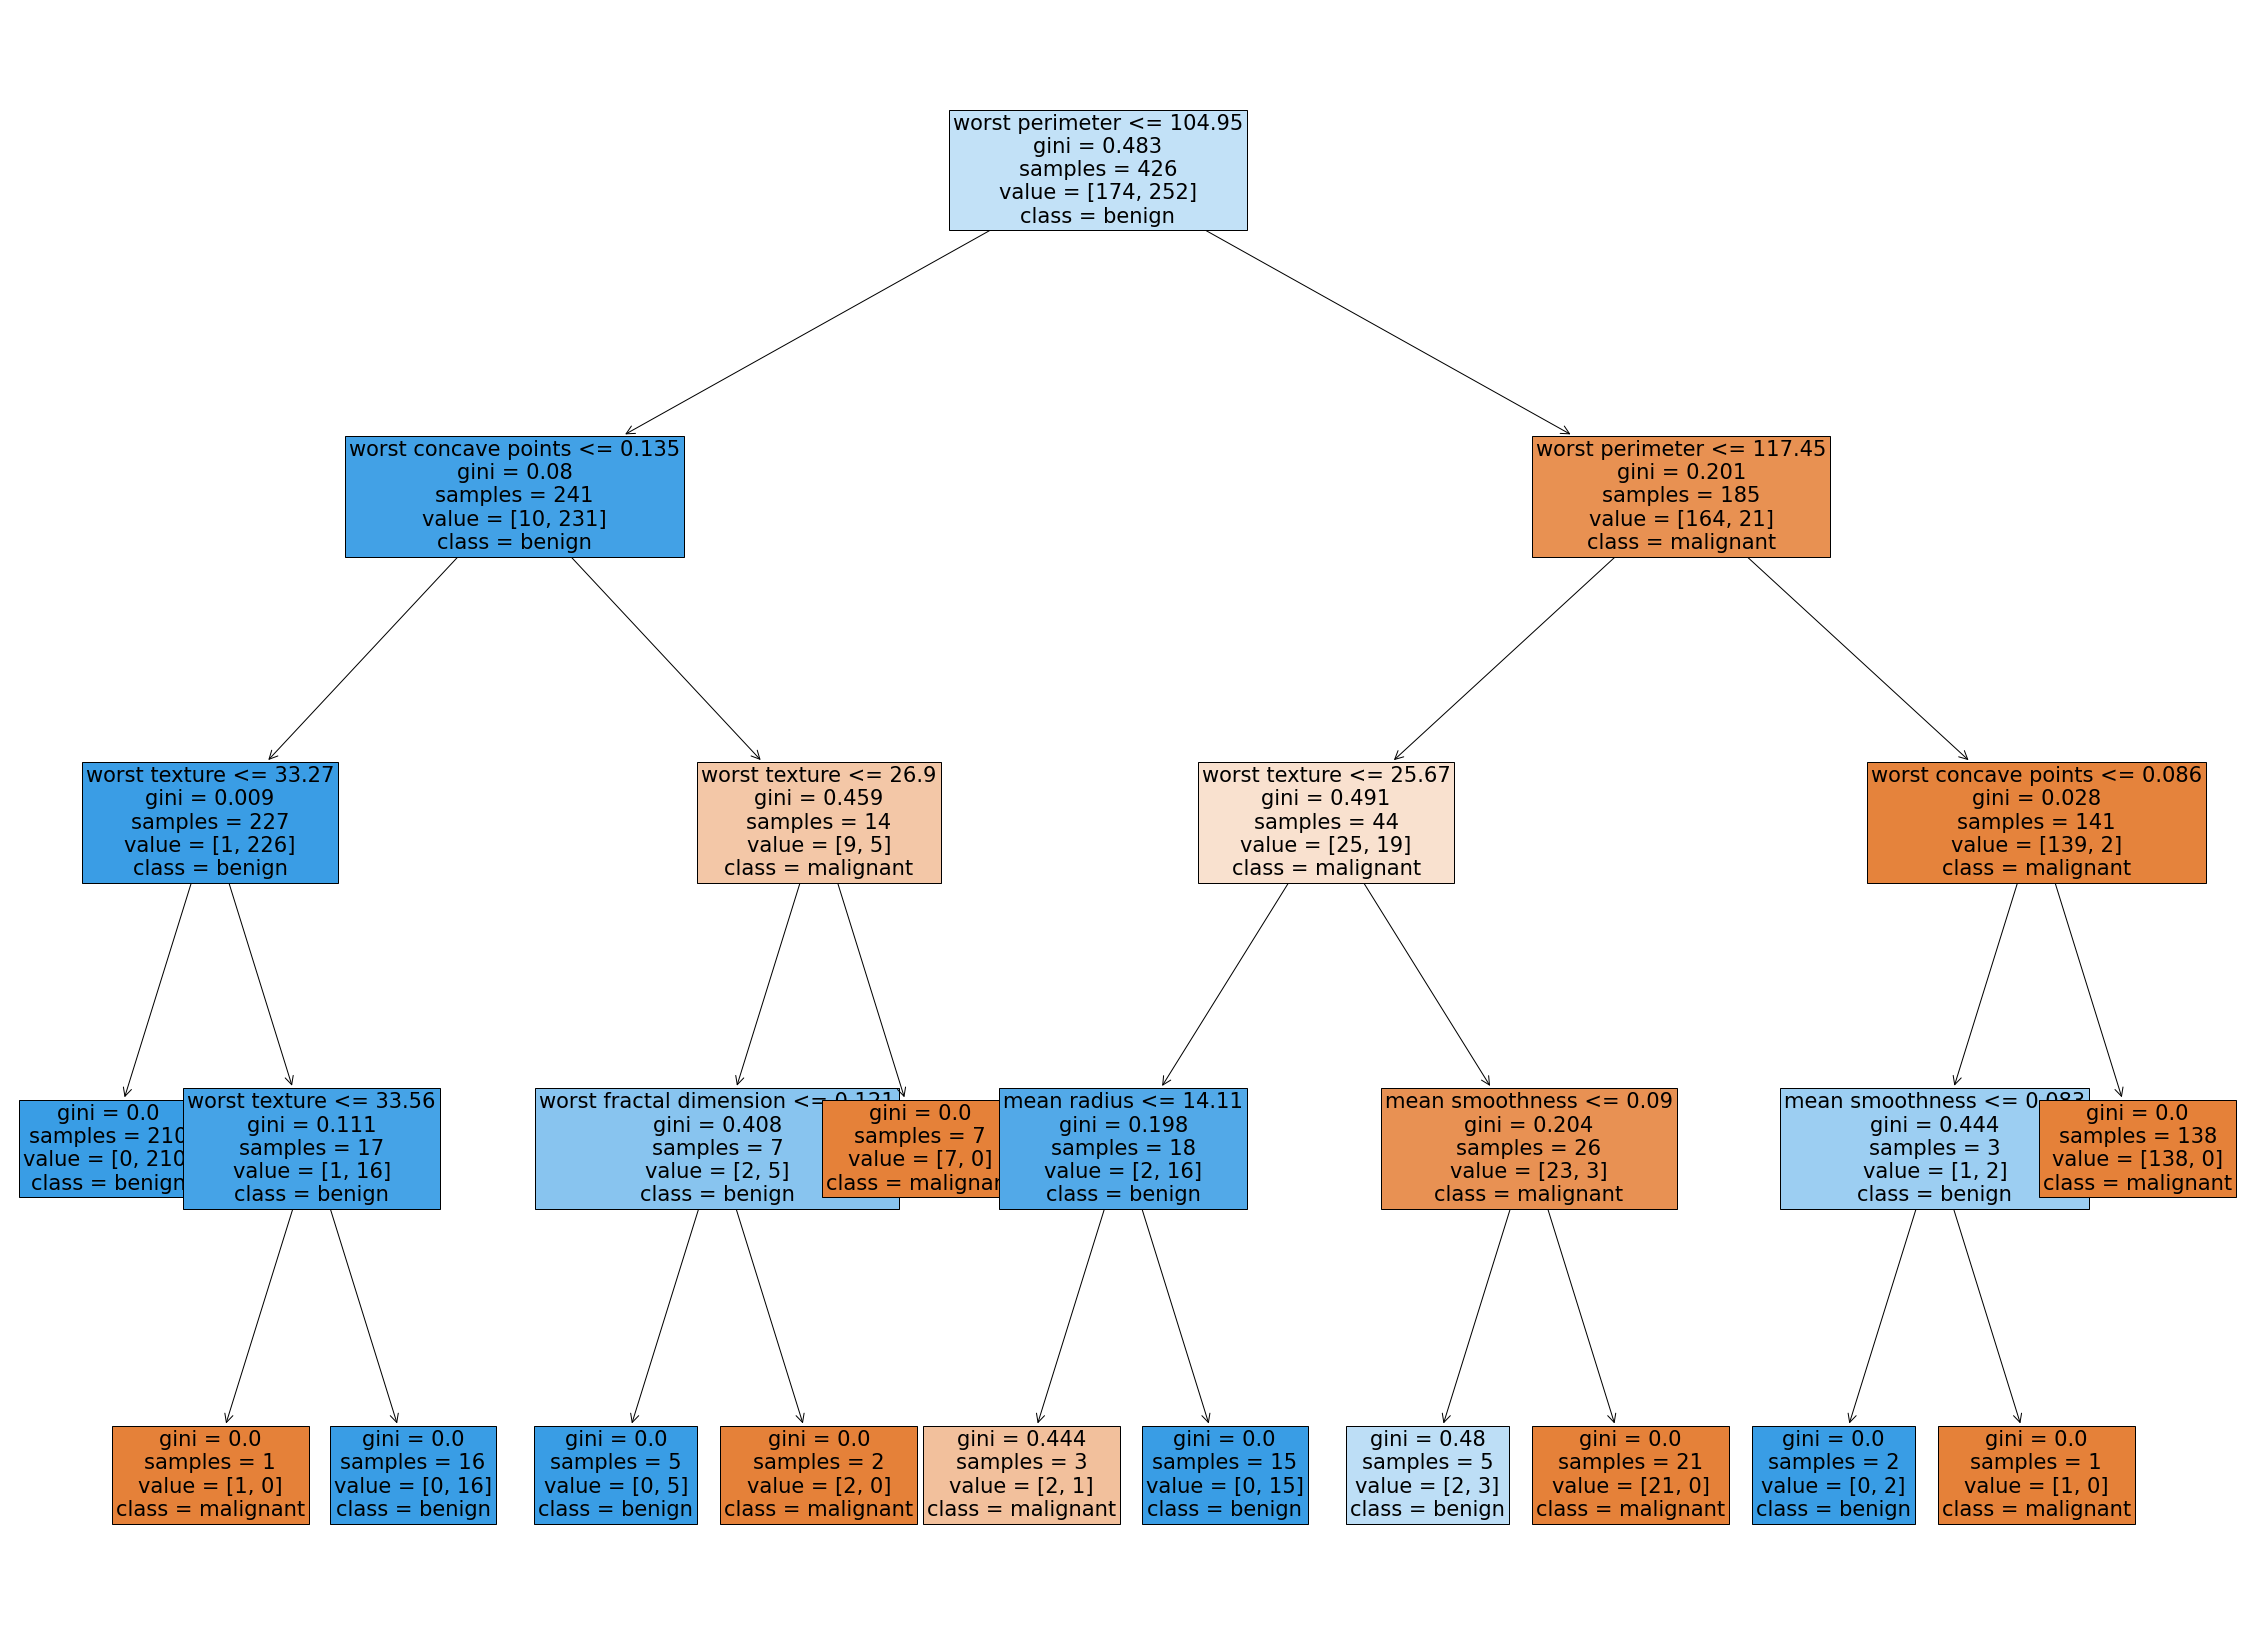

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

fig = plt.figure(figsize=(40,30))

X_train,X_test,y_train,y_test= train_test_split(data,target)

clf = tree.DecisionTreeClassifier(random_state=0,max_depth=4)

clf = clf.fit(X_train, y_train)

tree.plot_tree(clf,filled=True,
               fontsize=21,
               feature_names=breast_cancer.feature_names,
               class_names=breast_cancer.target_names) 

print('Sklearn with cross validation accuracy  {:.2%}'.format(clf.score(X_test,y_test)))